# 핸즈온 머신러닝

## 챕터2

### 머신러닝 프로젝트 처음부터 끝까지

In [169]:
# 큰 그림을 보자.
# 데이터를 구하고
# 탐색 및 시각화 하자.
# 머신러닝 알고리즘을 위해 데이터를 준비하고
# 모델 선택 및 훈련,
# 모델을 상세하게 조정
# 솔루션 제시
# 시스템 론칭 & 모니터링 및 유지 보수

In [8]:
# StatLib 저장소의 캘리포니아 주택 가격 데이터셋 이용
# 1990년 캘리포니아 인구조사 데이터를 기반
# 범주형 특성 추가 & 몇 개 특성을 제외
# 캘리포니아 주택 가격 모델을 만들자(큰 그림)
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
print(fetch_housing_data())

None


In [9]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [10]:
housing = load_housing_data()
print(housing.head())
# 각 행은 하나의 구역을 나타낸다.
# ocean_proximity가 NEAR BAY 로 반복되는 걸로 봐서 -> 카테고리 자료형일 것이다.(범주형)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [11]:
# 특성
print(housing.columns)
# >>> 10개

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [12]:
# 데이터에 대한 설명
print(housing.info())
# ocean_proximity만 object, 나머지는 전부 float64
# 20640 entries : 20640개의 샘플

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [13]:
# ocean_proximity 열의 카테고리마다 얼마나 많은 구역이 있나? 
print(housing['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [14]:
# 숫자형 특성의 요약 정보 확인
print(housing.describe())
# 25% : 제 1사분위수
# 50% : 중간값
# 75% : 제 3사분위수
# std : 표준편차(값이 퍼져 있는 정도)

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

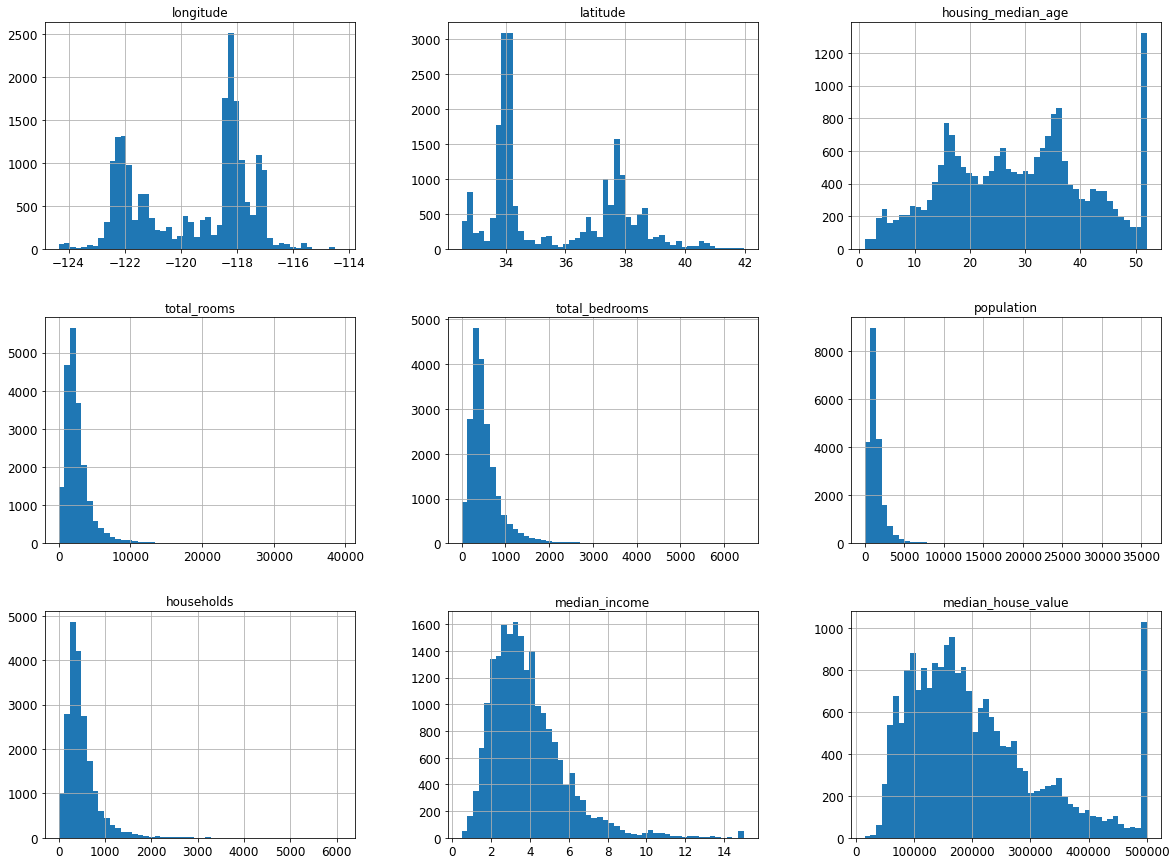

In [15]:
# 히스토그램
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()
# median_income(중간 소득) 특성이 US 달러로 표현되어 있지 않은 것 같다. 
# : (3 -> 실제로 약 30,000달러)
# housing_median_age(중간 주택 연도)와 median_house_value(중간 주택 가격)가 최댓값&최솟값을 한정했다.
# : (그래프 오른쪽 끝에서 갑자기 하늘위로)

In [16]:
# 테스트 세트 생성
# 테스트세트를 따로 떼어놓고, 절대 들여다보지 말자! 

# 데이터 스누핑(data snooping)편향
# : 매우 낙관적인 추정
#   테스트 세트를 들여다보면, 테스트 세트에서 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택할 수도 있고, 과대적홥되기 쉽다.

# 테스트 세트는 보통 무작위&20% 정도.
# 데이터셋이 매우 크다면 테스트 세트의 크기를 20%보다 작게 해야.
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)) * test_ratio
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
# >>> 프로그램을 다시 실행하면 다른 테스트 세트가 생성.
# >>> 하지만 너무 많이하면, 우리 or 머신러닝 알고리즘이 전체 데이터셋을 보게되니 주의하자!

In [17]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index() # index를 새로 부여
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [19]:
housing_with_id['id'] = housing['longitude'] * 100 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [20]:
# random_state : 난수 초깃값 지정 매개변수
# 보통 42 사용 >>> 별 의미x
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

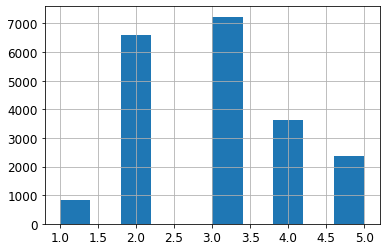

In [21]:
# pd.cut() >>> 카테고리 5개를 가진 소득 카테고리 특성 생성
# : 1_5까지 레이블.

# 카테고리 1 : 0 ~ 1.5
# 카테고리 2 : 1.5 ~ 3

housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0, 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
# 소득 카테고리 비율 살펴보기
# 테스트 세트는 원래 들여다보면 안됨!
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [24]:
# income_cat 특성(열) 삭제, 원래 상태로 되돌리기
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# drop() : 행(axis=0) 삭제
#          열(axis=1) 삭제

In [25]:
# 데이터 탐색 및 시각화
# 데이터를 손상시키지 않기 위해 복사본 사용
# copy()
housing = strat_train_set.copy()

In [26]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
matplotlib.rcParams['axes.unicode_minus'] = False
# 한글 폰트 지정 후 그래프에서 마이너스 폰트 깨지는 문제 해결

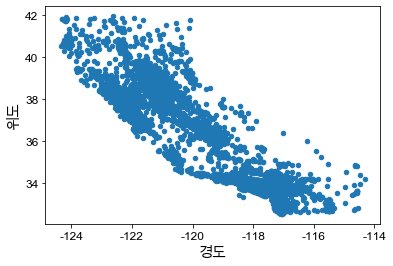

In [27]:
# 지리적 데이터 시각화
housing.plot(kind="scatter", x='longitude', y='latitude')
plt.xlabel('경도')
plt.ylabel('위도')
plt.show()

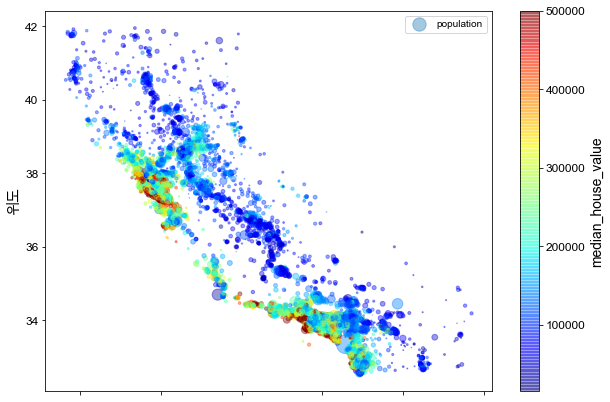

In [28]:
# 더 두드러진 패턴 보기
# s=구역의 인구
# c=색상(가격)
# cmp=plt.get_cmap("jet") : 미리 정의된 컬러 맵
# alpha=투명도
from matplotlib.pyplot import *

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c="median_house_value", cmap="jet", colorbar=True,
            sharex=True)
plt.legend()
plt.xlabel('경도')
plt.ylabel('위도')
plt.show()

# >>> 주택 가격은 지역과 인구 밀도에 관련이 크다.
# >>> 해안 근접성 : 북부의 해안가는 주택 가격이 그리 높지 않다.

In [29]:
# 상관관계 조사
# 1 ~ -1
# 상관계수 : 선형적인 상관관계만 측정.(기울기와 상관x)
# 데이터셋이 너무 크지 않을 때는 모든 특성 간의 표준 상관계수(피어슨의 r)구할 수 있다.
# corr()

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# >>> median_income         0.687160 (중간 소득이 올라갈때 주택 가격도 조금씩 상승)
# >>> latitude             -0.142724 (북쪽으로 갈수록 주택 가격이 조금씩 하락)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

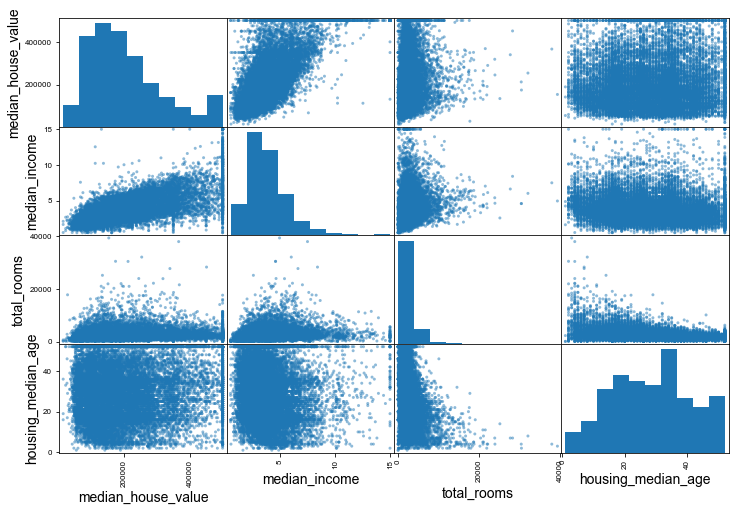

In [30]:
# scatter_matrix()
# : 숫자형 특성 사이에 산점도 그려주는 함수
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
# 4 **2 = 16개 그래프
scatter_matrix(housing[attributes], figsize=(12, 8))
# >>> 중간 주택가격(median_house_value)을 예측하는데 가장 유용할 것 같은 특성 : 중간 소득(median_income)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

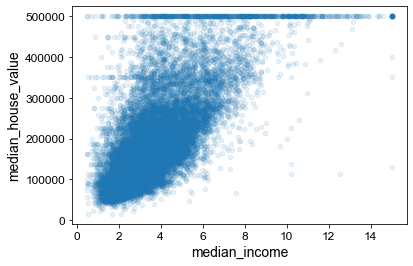

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
# >>> 상관관계가 매우 강함
# 수평선이 여러 개 보임 >>> 이것은 해당 구역을 제거해야.

In [32]:
# 특성 조합
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [33]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# >>> median_income               0.687160
# >>> bedrooms_per_room          -0.259984
# 해당 과정을 반복해서 가장 유용한 특성 조합을 찾아내자.

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [34]:
# 데이터 준비
# for ml argorithms
# 데이터 원래대로 복원
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [35]:
# 데이터 정제
# 누락된 특성 다루기

# dropna(구역) : 구역 제거
# drop(특성) : 전체 특성 삭제
# fillna() : 해당 값으로 결측치 교체
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [36]:
# imputer : 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장.
# 모든 수치형 특성에 적용하는 것이 바람직
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num) # fit() : 훈련 데이터에 적용
print(imputer.statistics_)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [37]:
# imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 대체
X = imputer.transform(housing_num)

In [38]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [39]:
# 추정기(estimator)
# : 데이터셋을 기반으로 일련의 모델 파라미터들을 추정하는 객체
#   imputer 객체
#   추정 자체는 fit() 메서드가 수행.
#   추정 과정에서 필요한 다른 매개변수들은 모두 하이퍼파라미터로 간주

# 변환기(transform)
# : 데이터셋을 변환하는 추정기
#   imputer
#   변환은 transform() 메서드가 수행.
#   모든 변환기는 fit_transfortm() 메서드도 가지고 있다. -> fit(), transform()을 연달아 호줄하는 것과 동일

# 예측기(predictor)
# : LinearRegression 모델
#   predict() 메서드 -> 새로운 데이터셋을 받아 이에 상응하는 예측값을 반환
#   테스트 세트 : score() 지님.

# 조합성 : 기존의 구성요소를 최대한 재사용
#        여러 변환기를 연결한 다음 마지막에 추정기 1개를 배치한 Pipeline 추정기 쉽게 만들 수 있다.

In [40]:
# 텍스트 & 범주형 특성 다루기
print(housing.info())
# >>> ocean_proximity     16512 non-null  object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
None


In [41]:
housing_cat = housing[['ocean_proximity']]
print(housing_cat.head(10))
# >>> 카테고리 (범주형 특성)

      ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN


In [42]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [43]:
# categories_ : 카테고리 목록 반환
ordinal_encoder.categories_
# 순서 있는 카테고리 : 가까이 있는 두 값이 떨어져 있는 두 값보다 비슷 (괜춘)
# 순서 없는 카테고리 : 문제가 됨
# >>> 카테고리별 이진 특성을 만들어 해결

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [44]:
# 원-핫 인코딩(one-hot encoding)
# : 카테고리가 ~일 때, 한 특성이 1 & 그 외 다른 특성들은 모두 0이 되는 것.
# 새로운 특성 : 더미 특성이라고도 한다.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
# sparse matrix : 희소행렬
# 희소행렬은 0이 아닌 원소의 위치만 저장 >>> 메모리 관리 효율적

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
# toarray()
# : 희소행렬 > 넘파이 배열로 바꾸는 함수
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [46]:
# 카테고리 목록
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [47]:
# 카테고리 수가 많다면..?
# 원-핫 인코딩은 많은 수의 입력 특성을 만들게 된다. -> 속도 저하&성능 감소 우려
# 범주형 >>> 숫자 특성으로 바꾸고 싶을 것
# or 각 카테고리를 임베딩(embedding)이라고 부르는 학습 가능한 저차원 벡터로 변경 가능.
# 훈련 하는 동안, 각 카테고리의 표현이 학습되는데, 이를 표현 학습(representation learning)이라 한다.

In [48]:
# 나만의 변환기
# 변환기: 변환을 하는 추정기, transform(), fit_transform()

# 조합 특성을 추가하는 간단한 변환기
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [49]:
# 특성 스케일링
# feature scaling
# : 입력 숫자 특성들의 스케일이 많이 다르면 머신러닝 잘 작동 안한다.

# 모든 특성의 범위를 같도록 만들어주는 방법
# 1) min-max 스케일링 (정규화)
#    : 0~1 범위에 들도록 값을 이동, 스케일 조정(feature_range 매개변수로 범위 변경)
#      데이터에서 최솟값을 뺀 후, 최댓값과 최솟값의 차이로 나눈다.
#      MinMaxScaler 변환기
# 2) 표준화(standardization)
#    : 평균을 뺀 후 표준편차로 나누어 결과 분포의 분산이 1이 되도록 한다.
#      이상치에 영향을 덜 받음.
#      StandardScaler 변환기

In [50]:
# 변환 파이프라인
# 순서 지키자
# Pipeline 클래스
# : 연속된 변환을 순서대로 처리
#   연속된 단계를 나타내는 이름/추정기 쌍의 목록을 입력으로.
# 숫자 특성을 처리하는 간단한 파이프라인
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
# fit() 메서드 호출 : 모든 변환기의 fit_transform()메서드를 순서대로 호출, 한 단계의 출력을 다음 단계의 입력으로 전달.
# 마지막 단계에서는 fit() 메서드만 호출.

# 파이프라인 객체 : 마지막 추정기와 동일한 메서드 제공

In [51]:
# 하나의 변환기로 각 열마다 적절한 변환을 적용해, 모든 열 처리
# ColumnTransformer class
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # 수치형 열 이름의 리스트 생성
cat_attribs = ["ocean_proximity"] # 범주형 열 이름의 리스트 생성

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs), # 범주형(카테고리) 열 변환
])

housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
# 모델 선택 & 훈련
# 선형 회귀 모델 훈련
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [53]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [54]:
# 해당 회귀 모델의 RMSE 측정
# mean_square_error()
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
# 예측 오차 68% : 좋은 점수는 아니다.
# >>> 과소적합
# : 특성이 너무 적거나, 모델이 강력하지 못해서 발생.

# 과소적합 해결
# : 더 좋은 특성 주입 또는 모델 규제 감소 또는 더 복잡(강력)한 모델 선택

68628.19819848923

In [55]:
# 더 복잡한 모델 시도
# (과소적합 해결 위해)
# DecisionTreeRegressor
# : 더 강력하고, 데이터에서 복잡한 비선형 관계 찾을 수 있다.
#   결정 트리

from sklearn.tree import DecisionTreeRegressor

# 결정 트리 모델 훈련
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [56]:
# 결정 트리 모델 평가
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
# 예측 오차 : 0%
# >>> .....?!
# 심하게 과대적합

0.0

In [57]:
# 교차 검증을 사용한 평가
# k-겹 교차 검증 (k-fold cross-validation)
# 훈련 세트를 폴드라고 불리는 서브셋으로 무작위 분할(cv=10) -> 결정 트리 모델을 10번 훈련 & 평가
# 이 때, 매 번 다른 폴드를 선택해 평가에 사용, 나머지 9개 폴드는 훈련에 사용
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
# -scores : 매개변수에 효용 함수를 기대. 그래서 효용함수가 클수록 좋기 때문에, -를 붙여 반댓값으로 만듦

In [58]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())
    
display_scores(tree_rmse_scores)
# 71% >>> 별로 좋아보이지 않는다.

점수: [68900.22866324 66954.39622709 69558.23050278 68842.0324794
 70374.10605521 74160.57993321 70767.08145378 71883.03617297
 75785.27743164 69130.62220019]
평균: 70635.55911195061
표준편차: 2525.703212589346


In [59]:
# 선형 회귀 모델의 점수 계산
# 비교 위해
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
# 69%
# >>> 결정트리가 과대적합되어 선형회귀보다 나쁘다.
#     71%.              69%. 

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준편차: 2731.6740017983507


In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [61]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [62]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
평균: 50182.303100336096
표준편차: 2097.0810550985693


In [63]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [64]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

In [65]:
# 모델 세부 튜닝
# 그리드 탐색
# 최적의 하이퍼파라미터 조합 탐색
# GridSearchCV
from sklearn.model_selection import GridSearchCV

# RandomFroestRegressor 에 대한 최적의 하이퍼파라미터 조합을 탐색
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}]
# [3,10,30] 3개 * [2,4,6,8] 4개 = 12개 (먼저 평가.)
# 그 다음, [3,10] 2개 * [2,3,4] 3개 = 6개 평가.
# >>> 12개 + 6개 = 18개 조합.

# n_estimators : 더 세밀하게 탐색하기 위한 하이퍼파라미터

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                          return_train_score=True)
# cv=5 -> 각각 5번 모델 훈련
# 18 * 5 =90. (전체 훈련 횟수)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
# 최적의 하이퍼파라미터 출력
# best_params_
grid_search.best_params_
# >>> max_features : 8, n_estimators:30
# 8, 30은 탐색 범위의 최댓값이기 때문에 계속된 점수 향상의 가능성이 있으므로 더 큰 값으로 다시 검색해야.

{'max_features': 6, 'n_estimators': 30}

In [67]:
# 최적의 추정기에 직접 접근
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [68]:
# 평가 점수 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

# 50096.494074587485 {'max_features': 8, 'n_estimators': 30}
# 50,096 >>> 최적의 하이퍼파라미터로 얻은 점수.

64103.852153753214 {'max_features': 2, 'n_estimators': 3}
55826.19564726247 {'max_features': 2, 'n_estimators': 10}
52901.604533881306 {'max_features': 2, 'n_estimators': 30}
59911.86046705823 {'max_features': 4, 'n_estimators': 3}
52685.07614542985 {'max_features': 4, 'n_estimators': 10}
50723.09984589002 {'max_features': 4, 'n_estimators': 30}
59860.52972222872 {'max_features': 6, 'n_estimators': 3}
51751.304297622475 {'max_features': 6, 'n_estimators': 10}
50063.291789730705 {'max_features': 6, 'n_estimators': 30}
59049.5165216665 {'max_features': 8, 'n_estimators': 3}
52030.18994388368 {'max_features': 8, 'n_estimators': 10}
50201.85684852307 {'max_features': 8, 'n_estimators': 30}
62446.559544185744 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54239.39650383056 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59892.59580793642 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52332.20427015266 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [69]:
# 그리드 탐색 방법 : 비교적 적은 수의 조합시 유리.
# but, 탐색 공간이 커지면 RandomizedSearchCV를 사용하는 것이 낫다.
# RandomizedSearchCV를 : 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가.
# : 단순히 반복 횟수 조절을 통해 컴퓨팅 자원 제어 가능.

# 앙상블 방법 : 세밀 튜닝하기 위해 모델을 연결하는 것
# : 개개의 모델이 각기 다른 형태의 오차를 만들 때 유리.

In [70]:
# 최상의 모델
# RandomForestRegressor
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.82801635e-02, 7.09844017e-02, 4.11006996e-02, 1.86877763e-02,
       1.64703381e-02, 1.71827488e-02, 1.68750801e-02, 3.67118703e-01,
       4.37942458e-02, 1.06135956e-01, 5.71166055e-02, 1.00258783e-02,
       1.48088514e-01, 1.22214377e-04, 4.63157145e-03, 3.38510392e-03])

In [71]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)
# >>> 해당 출력 결과를 바탕으로 덜 중요한 특성 제거 가능.

[(0.36711870317762735, 'median_income'),
 (0.1480885137442952, 'INLAND'),
 (0.10613595573339693, 'pop_per_hhold'),
 (0.07828016347536468, 'longitude'),
 (0.07098440168681569, 'latitude'),
 (0.05711660548622647, 'bedrooms_per_room'),
 (0.04379424576971098, 'rooms_per_hhold'),
 (0.04110069962958866, 'housing_median_age'),
 (0.0186877762602899, 'total_rooms'),
 (0.01718274880312499, 'population'),
 (0.01687508010592403, 'households'),
 (0.016470338112055637, 'total_bedrooms'),
 (0.010025878266511861, '<1H OCEAN'),
 (0.004631571453038554, 'NEAR BAY'),
 (0.003385103919024454, 'NEAR OCEAN'),
 (0.0001222143770045587, 'ISLAND')]

In [72]:
# 테스트 세트로 시스템 평가
# fit_transform() 아니라! -> transform()
# 테스트 세트에서 최종 모델 평가
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47428.487731457615

In [73]:
# 신뢰구간 계산
# scipy.stats.t.interval()
from scipy import stats
confidence = 0.95 # 일반화 오차 95%
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45475.18777127, 49304.46424163])

In [74]:
# 하이퍼파라미터 튜닝을 많이 했다면 교차 검증 성능보다 조금 낮은 것이 보통.
# 위의 경우가 생기더라도 테스트 세트에서 성능 수치를 좋게 하려고 하이퍼파라미터를 튜닝하려고 시도해서은 안된다.
# >>> 억지로(?) 향상된 성능은 새로운 데이터에 일반화되기 힘들다.

## 챕터 3

### 분류

In [4]:
# 가장 일반적인 지도학습 : 회귀(값/숫자 예측) & 분류(클래스/이름 예측)
# 손으로 쓴 70,000개의 작은 숫자 이미지 MNIST 데이터셋
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())
# 'target' : 레이블 배열
# 'data' : 샘플이 하나의 행, 특성이 하나의 열로 구성.
# 'DESCR' : 데이터셋 설명

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [5]:
X, y = mnist["data"], mnist["target"]
X.shape
# image : 70,000개 있고, 각 이미지에는 784의 특성이 존재.
# 개개의 특성은 단순희 0(흰색) ~ 255(검은색)의 픽셀 강도

(70000, 784)

In [6]:
y.shape

(70000,)

In [8]:
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

그림 저장: some_digit_plot


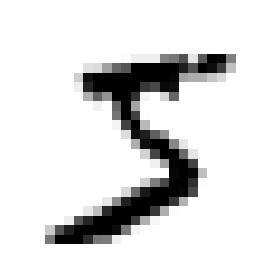

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [10]:
y[0]

'5'

In [12]:
import numpy as np
y = y.astype(np.uint8)

In [13]:
# MNIST dataset : 이미 훈련세트(앞쪽 60,000개), 테스트세트(뒤쪽 60,000)로 나누어놓음
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
# 이진 분류기 훈련
# 숫자 5만 식별
# 5-감지기 : 5 / 5아님 -> 두 개의 클래스를 구분할 수 있는 이진 분류기(binary classifier)
# 타깃 벡터 생성
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
# 확률적 경사하강법(Stochastic Gradient Descent)-SGD
# : 매우 큰 데이터셋 효율적으로 처리
# : 한 번에 하나씩 훈련 샘플을 독립적으로 처리
# : 온라인 학습에 유리
# SGD는 샘플을 섞어야 하는 대표적인 경우

# SGDClassifier 모델 생성 후 전체 훈련 세트를 사용해 훈련
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
# 숫자 5의 이미지 감지
sgd_clf.predict([some_digit])
# >>> True : some_digit == 5

array([ True])

In [17]:
# 성능 측정
# 교차 검증을 사용한 정확도 측정

# 교차 검증 기능 직접 구현
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [20]:
# cross_val_score()
# 폴드 3개, k-겹 교차 검증 사용
# SGDClassifier 모델 평가
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# >>> 모든 교차 검증 폴드에 대해 정확도가 95% 이상.

array([0.95035, 0.96035, 0.9604 ])

In [21]:
# 모든 이미지를 5 아님 클래스로 분류하는 더미 분류기 생성
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [22]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# >>> 90% 이상. ( 10% 정도만 숫자 5이기 때문에 무조건 5 아님으로 예측하면 90%이상 나옴.)

array([0.91125, 0.90855, 0.90915])

In [23]:
# 오차 행렬(confusion matrix)
# : 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것.
# : 분류기가 5의 이미지를 3으로 잘못 분류한 횟수를 알고자 한다면? -> 오차 행렬의 5행 3열을 보면 된다.

# 실제 타깃과 비교 가능하도록 먼저 예측값을 만들어야 한다.
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# cross_val_predict() : k-겹 교차검증 수행, but 각 테스트 폴드에서 얻은 예측 반환.

In [24]:
# confusion_matrix() : 오차 행렬 생성 함수
# 타깃 클래스 : y_train_5
# 예측 클래스 : y_train_pred
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
# 오차 행렬의 행 : 실제 클래스
#          열 : 예측한 클래스

array([[53892,   687],
       [ 1891,  3530]])

In [25]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)
# 진짜음성 거짓양성      TN FP     TN  0
# 거짓음성 진짜양성      FN TP      0  TP

array([[54579,     0],
       [    0,  5421]])

In [26]:
# 정밀도(precision)
# : 양성 예측의 정확도
# 진짜양성 / 진짜양성 + 거짓 양성
# >>> 모든 양성(진짜&거짓)들 중에 진짜 양성일 확률

# 재현율(recall)
# : 분류기가 정확하게 감지한 양성 샘플의 비율
#   민감도 혹은 진짜 양성 비율이라고 한다.
# 진짜 양성 / 진짜양성 + 거짓음성
# >>> 진짜양성과 거짓음성을 합한 것 중에 진짜 양성일 확률

In [27]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [28]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [29]:
# F1 점수
# : 정밀도와 재현율의 조화 평균(harmonic mean)
# 두 분류기를 비교할 때 사용
# 2 / 정밀도 분의 1 + 재현율 분의 1
# f1_score()
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# 정밀도&재현율 비슷한 분류기 >>> F1 점수가 높.
# >>> 상황에 따라 정밀도가 중요할 수도, 재현율이 중요할 수도.
# 높은 정밀도(낮은 재현율) 선호 : 어린아이에게 안전한 동영상 걸러내기 -> 좋은 동영상이 좀 제외되더라도 정말 나쁜건 다 제외해야하니까.
# 낮은 정밀도(높은 재현율) 선호 : CCTV로 좀도둑 잡기 -> 경비원이 잘못된(일반 사람)호출을 종종 받더라도 거의 모든 좀도둑을 잡을 것이다. 

0.7325171197343846

In [30]:
# 정밀도/재현율 트레이드오프
# SGDClassifier 분류기 : 결정 함수(decision function)를 사용하여 각 샘플의 점수 계산
# -> 결정 임곗값(decision threshold)보다 점수가 크면 양성 클래스. 낮으면 음성 클래스 할당
# >>> 임곗값 높. 재현율 낮. 정밀도 높.
# decision_function() : 각 샘플의 점수 얻는 메서드
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

[2164.22030239]


In [31]:
# SGDClassifier의 임곗값 = 0
threshold = 0
y_some_digit_pred = (y_scores > threshold) # 분류기의 점수 > 임곗값(0)

In [32]:
y_some_digit_pred
# SGDClassifier의 임곗값 = 0 >>> True 반환.

array([ True])

In [33]:
# SGDClassifier의 임곗값 = 8000
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
# False

array([False])

In [34]:
# 적절한 임곗값 구하기
# 먼저 cross_val_predict()를 사용해 훈련 세트의 모든 샘플 점수를 구하자
# 하지만 이번에는 결정 점수를 반환받도록 지정(예측 결과x) 
# method="accuracy" >>> method="decision_function"
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [35]:
# precision_recall_curve()
# : 가능한 모든 임곗값에 대해 정밀도와 재현율 계산 가능.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

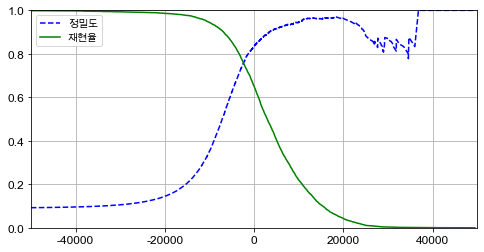

In [37]:
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
matplotlib.rcParams['axes.unicode_minus'] = False
# 한글 폰트 지정 후 그래프에서 마이너스 폰트 깨지는 문제 해결

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
    plt.legend()
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
plt.figure(figsize=(8, 4))     
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
# >>> 임곗값을 올리더라도 가끔 정밀도가 낮아질 수도 있다.(파란 점선이 울퉁불퉁한 이유)
# >>> but, 재현율은 임곗값이 올라감에 따라 줄어들 수 밖에 없음

그림 저장: precision_vs_recall_plot


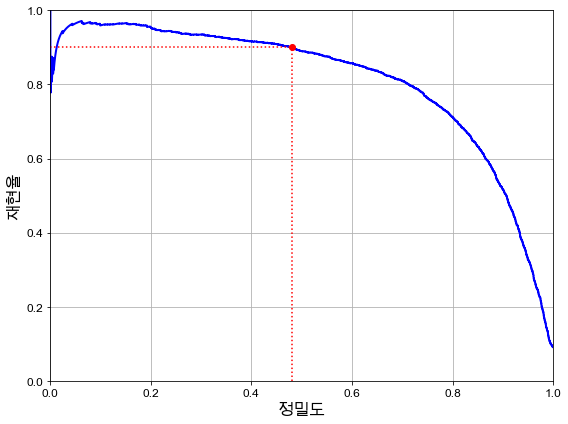

In [38]:
# 재현율에 대한 정밀도 곡선
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("정밀도", fontsize=16)
    plt.ylabel("재현율", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]    
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()
# >>> 재현율 80% 쯤에서 정밀도가 급격하게 줄어들기 시작. 이 점을 트레이드오프로 선택.

In [39]:
# 가정) 정밀도 90% 달성 목표
# 임곗값은 약 8,000 정도.
# 최소한 90% 정밀도가 되는 가장 낮은 임곗값 찾기
# np.argmax() : 최댓값의 첫 번째 인덱스 반환
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [40]:
# predict() 메서드 대신
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [41]:
# 해당 예측에 대한 정밀도/재현율 확인
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

# + 누군가 정밀도 90%를 달성하자! 라고 물으면 재현율 얼마에서?라고 답해야한다.

0.9000345901072293
0.4799852425751706


In [42]:
# ROC 곡선
# : 수신기 조작 특성 곡선(receiver operating characteristic)-ROC
#   거짓 양성 비율(FPR-false positive rate)에 대한 진짜 양성 비율(TPR-true positive rate:재현율)의 곡선
#   - FPR : 양성으로 잘못 분류된 음성 샘플의 비율 (1 - 진짜음성비율(TNR-true negative rate)을 뺀 값)
#   - TNR : 특이도(specificity)
# >>> ROC곡선 : 민감도(재현율)에 대한 1 - 특이도 그래프.
# roc_curve()
# TPR, FPR 먼저 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

그림 저장: roc_curve_plot


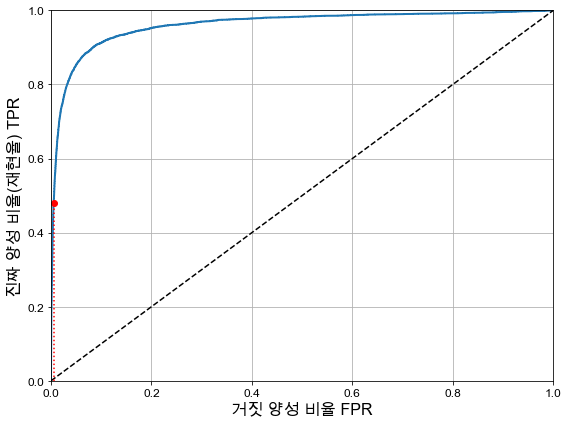

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('거짓 양성 비율 FPR', fontsize=16) # Not shown
    plt.ylabel('진짜 양성 비율(재현율) TPR', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

# >>> 붉은 점 : 선택한 비율의 지점
# >>> 왼쪽 위 상단(y축의 1.0부분) : 좋은 분류기는 점선(완전ROC)에서 가능한 멀리 떨어져야 한다. -> AUC 값이 커야한다.
# >>> 점선 : 완전한 랜덤 분류기의 ROC 곡선
# >>> 점선 밑 삼각형 : 곡선 아래의 면적(AUC) -> 완전한 랜덤 분류기의 AUC(area under the curve) = 0.5

In [44]:
# 양성 클래스가 드물거나, 거짓 음성보다 거짓 양성이 더 중요할 때 -> PR(정밀도/재현율) 곡선 사용
# 그렇지 않으면 -> ROC 곡선 사용

In [45]:
# RandomForestClassifier 훈련
# SGDClassifier의 ROC 곡선 & ROC AUC 점수 비교

# 1. 훈련 세트의 샘플에 대한 점수 얻기
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
# predict_proba() : 샘플=행, 클래스=열, 샘플이 주어진 클래스에 속할 확률을 담은 배열 반환 메서드

# roc_curve() : 레이블과 점수를 기대
y_scores_forest = y_probas_forest[:, 1]
# 양성 클래스에 대한 확률을 점수로 사용
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

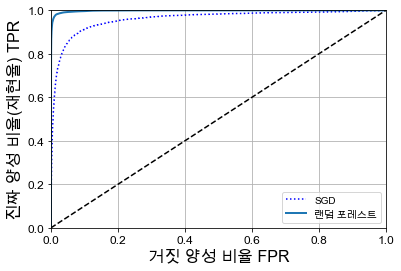

In [46]:
# 2. ROC 곡선 그리기
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right")
plt.show()

# >>> 랜덤 포레스트 분류기가 SGD 분류기보다 훨씬 왼쪽 위 상단 모서리에 가깝다. -> 랜덤 포레스트 분류기가 더 좋다.(AUC 값이 더 크다.)

In [47]:
# 다중 분류기(multiclass classifier)
# : 둘 이상의 클래스 구분 가능

# 이진 분류기를 여러 개 사용해서 다중 클래스 분류하는 방법도 있다.

# OvR(one-versus-the-rest) / OvA(one-versus-all) 전략
# : 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택
#   대부분의 이진 분류 알고리즘에서 선호.

# OvO(one-versus-one) 전략
# : 0과 1 구별, 0과 2 구별, 1과 2 구별 등과 같이 각 숫자의 조합마다, 이진 분류기를 훈련시키는 방법
#   클래스: N개 -> 분류기: N * (N-1) / 2 개 필요.
# 예) 45개 분류기가 필요하다면, 이미지 하나의 분류를 위해 45개 분류기 모두를 통과시킨 후, 가장 많이 양성으로 분류된 클래스 선택.
# >>> 각 분류기의 훈련에 구별할 두 클래스에 해당하는 샘플만 필요(장)
# 서포트 벡터 머신(SVM) - 훈련 세트에 민감, 작은 훈련 세트 -> 많은 분류기 훈련시키는 것이 빠르므로 OvO 선호.

# 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택 -> 사이킷런이 알고리즘에 따라 자동으로 OvR or OvO 실행.

In [48]:
# 서포트 벡터 머신 분류기 테스트
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
# y_train_5 대신 원래의 클래스 Y_train을 사용
# >>> 0~9까지 전체 타깃 클래스를 사용해 svc 훈련. -> 예측 하나 생성
# 사이킷런이 OvO 전략을 사용해서 45개 이진 분류기 훈련, 각각 결정 점수 얻어 점수가 가장 높은 클래스 선택.
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [49]:
# decision_function() : 샘플당 10개의 점수 반환
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores # 9.3132482

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [50]:
np.argmax(some_digit_scores)
# 가장 높은 점수 : 클래스 5에 해당하는 값

5

In [51]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [52]:
svm_clf.classes_[5]

5

In [54]:
# 사이킷런에서 OvO or OvR를 사용하도록 강제하기위해 OneVsOneClassifier or OneVsRestClassifier 사용
# 이진 분류기 인스턴스 생성하여 갱체 만들 때 전달하면 끝!
# SVC 기반으로 OvR 전략을 사용하는 다중 분류기 생성
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000]) # 전체 데이터셋은 너무 오래걸리기 때문에, 조정해서 사용.
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [55]:
len(ovr_clf.estimators_)

10

In [57]:
# SGDClassifier 훈련 또한 가능
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
# >>> array([3], dtype=uint8)
# 너무 오래걸려서, 예시를 보고 결과 확인.

KeyboardInterrupt: 

In [58]:
# SGD 분류기가 클래스마다 부여한 점수 확인
sgd_clf.decision_function([some_digit])
# >>> 대부분의 점수는 큰 음수 but, 클래스 5의 점수는 
# >>> 클래스 3을 조금 의심하는 중()
# >>> 분류기를 평가해보고 싶을 것이다.

array([[-31678.79290658, -34388.21248923,  -9287.24666981,
          2236.34358166, -22158.58647678,  -1488.8262491 ,
        -25943.50856205, -16114.8111081 ,      0.        ,
             0.        ]])

In [59]:
# 교차 검증 사용하여 분류기 평가
# cross_val_score() 사용하여 SGDClassifier의 정확도 평가
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
# >>> 모든 테스트 폴드에서 84% 이상.
# 입력 스케일 조정하면 정확도 높일 수 있다.
# array([0.87365, 0.85835, 0.8689 ]) 
# 너무 오래걸려서 >>> 예시로 결과확인.

KeyboardInterrupt: 

In [60]:
# 입력 스케일 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
# >>> 너무 오래 걸려서 예시 결과로 확인.
# https://github.com/rickiepark/handson-ml2/blob/master/03_classification.ipynb

KeyboardInterrupt: 